In [21]:
import numpy as np  
import matplotlib.pyplot as plt
import sympy as smp
from sympy import *
from scipy.integrate import odeint
from matplotlib import animation
from IPython.display import Latex, display

### Boundry conditions

In [22]:
# Boundry conditions
L1, L2=smp.symbols("L1 L2")
theta1, theta2=smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)
t, g= smp.symbols("t g")
m1, m2=smp.symbols("m1 m2")

In [23]:
theta1=theta1(t)
theta2=theta2(t)

### Defining the derivatives

In [24]:
init_printing()
theta1_d = smp.diff(theta1, t)
theta2_d = smp.diff(theta2, t)
theta1_dd = smp.diff(theta1_d, t)
theta2_dd = smp.diff(theta2_d,t) 

In [25]:
display(Latex('''\\begin{equation}'''
      + latex(theta1_d)+latex(', ')+latex(theta2_d)+latex(', ')+latex(theta1_dd)+latex(', ')+latex(theta2_dd)
      + '''\end{equation} '''))

<IPython.core.display.Latex object>

### Defining the positions of each point mass

In [26]:
X1=L1*smp.sin(theta1)
Y1=-L1*smp.cos(theta1)
X2=L1*smp.sin(theta1)+L2*smp.sin(theta2)
Y2=-(L1*smp.cos(theta1)+L2*smp.cos(theta2))


In [27]:
display(Latex('''\\begin{equation}'''
      + latex('X1 = ')+latex(X1)+latex(', ')+latex('Y1 =')+latex(Y1)+ '''\end{equation} '''))
display(Latex('''\\begin{equation}'''
      + latex('X2 = ')+latex(X2)+latex(', ')+latex('Y2 =')+latex(Y2)+ '''\end{equation} '''))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Defining the kinetic and potential energies

In [28]:
T1=1/2 * m1 * (smp.diff(X1, t)**2 + smp.diff(Y1, t)**2)
T2=1/2 * m2 * (smp.diff(X2, t)**2 + smp.diff(Y2, t)**2)
T=T1+T2
U1=-m1*g*L1*smp.cos(theta1)
U2=-m2*g*(L1*smp.cos(theta1)+L2*smp.cos(theta2))
U=U1+U2
L=T-U

In [29]:
display(Latex('''\\begin{equation}'''
      + latex('T1 = ')+latex(T1)+latex(', ')+latex('U1 =')+latex(U1)+ '''\end{equation} '''))
display(Latex('''\\begin{equation}'''
      + latex('T2 = ')+latex(T2)+latex(', ')+latex('U2 =')+latex(U2)+ '''\end{equation} '''))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### The Lagrangian of the double pendulum is:

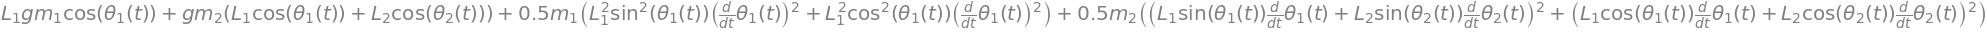

In [30]:
L

#### The Lagrangian of the double pendulum is thus L = L1+L2

### Solving Euler-Lagrange equations

In [31]:
LE1 = smp.diff(L, theta1) - smp.diff(smp.diff(L, theta1_d), t).simplify()
LE2 = smp.diff(L, theta2) - smp.diff(smp.diff(L, theta2_d), t).simplify()

#### we are left with two partial differential equations with two second derivatives. In order to get a second order ODE we need to solve for the two second derivatives. 

In [32]:
sol=smp.solve([LE1,LE2], (theta1_dd, theta2_dd), simplify=False, rational=False)

#### although we now have expressions of the second derivatives of both thetas and are left with two second order ODEs we have another problem. Python can only solve first order ODEs. The next thing we should do is convert our equations to first order ODEs as follows:

Define Z for each θ:

$$Z_1 = \frac{d\theta_1}{dt},Z_2=\frac{d\theta_2}{dt}$$

By substituting the second derivatives with Z we get a representation of a first order ODE!

Next, we want to convert all of our symbolic notations to numerical ones. 

In [33]:
dtheta1dt_f = smp.lambdify(theta1_d, theta1_d)
dtheta2dt_f = smp.lambdify(theta2_d, theta2_d)
dZ1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,theta1,theta2,theta1_d,theta2_d), sol[theta1_dd])
dZ2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,theta1,theta2,theta1_d,theta2_d), sol[theta2_dd])

Now we need to define a vector: 

$$\vec{S}=(\theta_1, Z_1,\theta_2, Z_2) $$

This vector is crucial for sloving ODEs in python. In order to solve ODEs we need to write a function that takes S and t and returns:

$$\frac{d\vec{S}}{dt}$$

In [34]:
def dSdt(S, t, g, m1, m2, L1, L2):
    theta1, Z1, theta2, Z2 = S
    return [dtheta1dt_f(Z1),
        dZ1dt_f(t, g, m1, m2, L1, L2, theta1, theta2, Z1, Z2),
        dtheta2dt_f(Z2),
        dZ2dt_f(t, g, m1, m2, L1, L2, theta1, theta2, Z1, Z2)]# returning all the derivatives of the S components
    

In [35]:
t = np.linspace(0, 40, 1001)# between zero to forty seconds at 1001 time points. 25 data points(frames) per second. 
g = 9.81
m1=1
m2=1
L1 = 1
L2 = 1
ans = odeint(dSdt, y0=[2, -2, -3, 1], t=t, args=(g,m1,m2,L1,L2))

In [36]:
ans

array([[  2.        ,  -2.        ,  -3.        ,   1.        ],
       [  1.9132272 ,  -2.33980908,  -2.96060629,   0.95506723],
       [  1.81263347,  -2.69335621,  -2.92488027,   0.81352424],
       ...,
       [  7.33528065,  -4.70317143, -11.98123184,  11.46776105],
       [  7.11215921,  -5.6958222 , -11.48988127,  12.2340775 ],
       [  6.92393398,  -3.68203716, -11.05131518,   9.75355587]])

we get an array with solutions for $$\theta_1, Z_1,\theta_2, Z_2 $$

In order to represent all the solutions for each parameter in a single array we transpose the answer array:

In [37]:
ans.T

array([[  2.        ,   1.9132272 ,   1.81263347, ...,   7.33528065,
          7.11215921,   6.92393398],
       [ -2.        ,  -2.33980908,  -2.69335621, ...,  -4.70317143,
         -5.6958222 ,  -3.68203716],
       [ -3.        ,  -2.96060629,  -2.92488027, ..., -11.98123184,
        -11.48988127, -11.05131518],
       [  1.        ,   0.95506723,   0.81352424, ...,  11.46776105,
         12.2340775 ,   9.75355587]])

Now we can index each array of solutions:

In [38]:
theta1=ans.T[0]
Z1=ans.T[1]
theta2=ans.T[2]
Z2=ans.T[3]

Now we need to get all the positions of the pendulum in order to plot its motion:

In [39]:
def get_XY(t,theta1, theta2, L1, L2):
    return (L1*np.sin(theta1),
            -L1*np.cos(theta1),
            L1*np.sin(theta1) + L2*np.sin(theta2),
            -L1*np.cos(theta1) - L2*np.cos(theta2))
X1, Y1, X2, Y2 = get_XY(t, theta1, theta2, L1, L2)

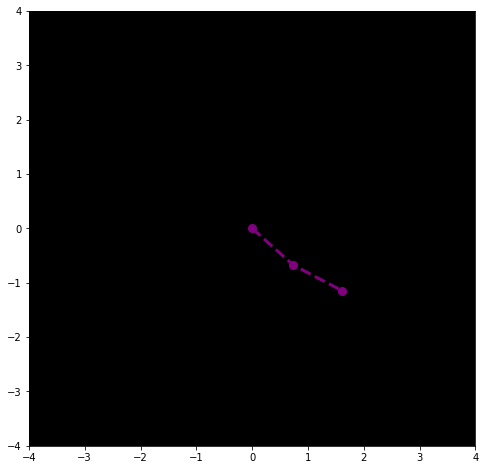

In [40]:
def animate(i):
    ln1.set_data([0, X1[i], X2[i]], [0, Y1[i], Y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
#ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
#ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8,color='purple')
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)